# Regression
---------------------------------

Download the abalone dataset from [https://archive.ics.uci.edu/ml/datasets/Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone).
 The goal of this dataset is to predict the age of abalone shells from physical measurements.

### Load the data

<<=============== ATOM ===============>>
Algorithm task: regression.


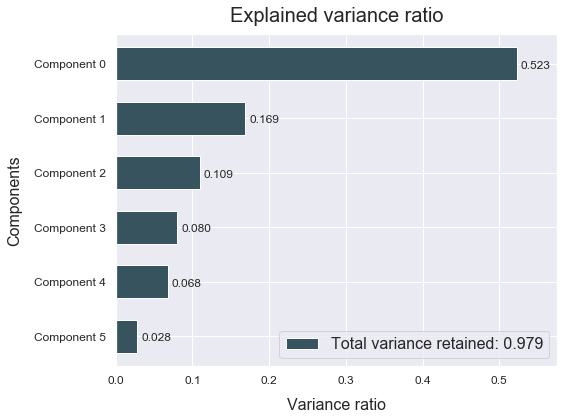

In [1]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

# Load the abalone dataset
X = pd.read_csv('../abalone.csv')
atom = ATOMRegressor(X, y="Rings", verbose=1, random_state=42)

# Encode categorical features
atom.encode()

# Apply PCA for dimensionality reduction
atom.feature_selection(strategy="pca", max_features=6)
atom.plot_PCA(figsize=(8, 6), filename='atom_PCA_plot')

### Run the pipeline

In [4]:
# Let's compare tree-based models using a successive halving approach
atom.pipeline(['tree', 'bag', 'et', 'rf', 'gbm', 'lgb'],
              metric='neg_mean_squared_error',
              successive_halving=True,
              max_iter=5,
              init_points=2,
              cv=1,
              bagging=5)


Running pipeline =================>
Metric: neg_mean_squared_error


<<=============== Iteration 0 ==============>>
Models in pipeline: Tree, Bag, ET, RF, GBM, LGB


Processing: 100%|████████████████████████████████| 6/6 [00:33<00:00,  5.54s/it]




Final results ================>>
Duration: 33.242s
Metric: neg_mean_squared_error
--------------------------------
Decision Tree             --> -5.509 ± 0.272 ~
Bagging Regressor         --> -6.176 ± 0.549 ~
Extra-Trees               --> -5.303 ± 0.082 ~
Random Forest             --> -5.216 ± 0.103 ~
Gradient Boosting Machine --> -5.176 ± 0.164 !! ~
LightGBM                  --> -5.926 ± 0.864 ~


<<=============== Iteration 1 ==============>>
Models in pipeline: ET, RF, GBM


Processing: 100%|████████████████████████████████| 3/3 [00:26<00:00,  8.89s/it]




Final results ================>>
Duration: 59.957s
Metric: neg_mean_squared_error
--------------------------------
Extra-Trees               --> -6.061 ± 0.181 !! ~
Random Forest             --> -6.285 ± 0.189 ~
Gradient Boosting Machine --> -6.152 ± 0.241 ~


<<=============== Iteration 2 ==============>>
Model in pipeline: ET


Processing: 100%|████████████████████████████████| 1/1 [00:25<00:00, 25.80s/it]



Final results ================>>
Duration: 1m:25s
Metric: neg_mean_squared_error
--------------------------------
Extra-Trees --> -7.152 ± 0.096 ~


### Analyze the results

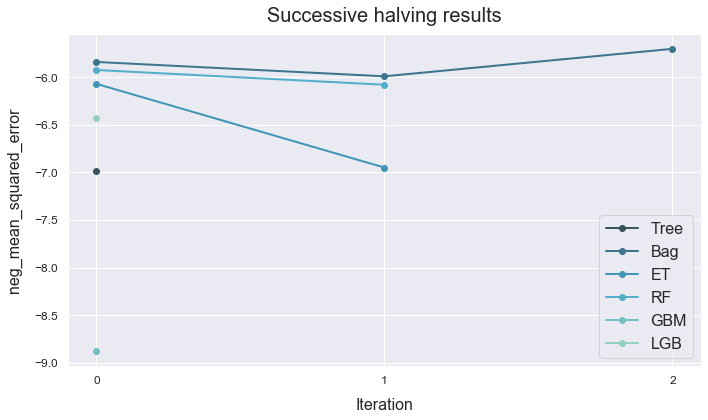

In [3]:
# Plot successive halving results
atom.plot_successive_halving()